# w2-project_pandas | Data Cleaning 

## Import libraries 

In [376]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [377]:
#import main libraries 

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt  
import seaborn as sns

%matplotlib inline

## Import data base 

In [378]:
linksharks = '/Users/criscarneiro/desktop/ironhack/7_DataProjects/1_w2_sharks/attacks.csv'

data = pd.read_csv(linksharks, encoding='latin1')

## Before continuing, some good practices 

In [379]:
# I will create a copy of the original database 

data_original = data.copy()
data_original.shape

(25723, 24)

In [380]:
# I will clean the names of columns 

data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [381]:
data.columns = [c.lower().replace(' ', '_') for c in data.columns]

data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [382]:
# There are sevel duplicates. Removing them would significantly I will keep them for now. 

data.drop_duplicates().shape

(6312, 24)

In [383]:
# Indeed, there are a number of duplicated entries

data[data.duplicated()]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
# We maitain our original shape 

print(data.shape)
print(data_original.shape)

(25723, 24)
(25723, 24)


## Exploratory Analysis 

In [385]:
#this is the structure of my data 

data.head(10)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [386]:
#this is a database with 24 columns, 25.723 entries (i.e, shark attacks)

data.shape

(25723, 24)

In [387]:
#here we can see again the number of columns and entries 
#4.7+ MB of memory 
#we see that most columns are non-numerical 
#we anticipate there are a lot of null values - we will work on cleaning some of them!

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [388]:
# it seems we have two unnamed columns. I will check what they are about. 

In [389]:
#unnamed:_22 has a single non-null value 

data['unnamed:_22'].unique()

array([nan, 'stopped here'], dtype=object)

In [390]:
#unnamed:_23 has two non-null values

data['unnamed:_23'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [391]:
#for now, I will rename them and deal with them later if required based on the objective of analysis 

data = data.rename(columns={'unnamed:_22': 'check1','unnamed:_23': 'check2' })

In [392]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'check1', 'check2'],
      dtype='object')

In [393]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original_order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


## Setting an objective 

- While the primary purpose of this exercise is 'Data Cleaning', **I will define a 'Data Analysis' objetive**. This will help guide the cleaning process by focusing on the most relevant variables and avoid 'boiling the ocean'.

- In this exercise, I will try to **understand the 'fatality' of the shark attacks**. In other words, I will understand if it is correlated with a sub-list of categorical variables (i.e., location, activity, sex, age, time of attack)

- Thefore, **I will prioritize those columns in my cleaning process** 

In [394]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'check1', 'check2'],
      dtype='object')

In [395]:
#as a starting point, I will prioritize those columns for the analysis. This could evolve depending on the quality of the data

columns_focus = ['type','country','area','location','activity','sex_','age','fatal_(y/n)','time','species_']

In [396]:
data[columns_focus]

,type,country,area,location,activity,sex_,age,fatal_(y/n),time,species_
0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00,White shark
1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00,NaN
2,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45,NaN
3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,NaN,2 m shark
4,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Looking for null values

In [397]:
## In absolute terms 

nan_cols = data.isna().sum()
nan_cols

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex_                      19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number.1             19421
case_number.2             19421
original_order            19414
check1                    25722
check2                    25721
dtype: int64

In [398]:
# In relative terms

# Clearly, there are quite a lot of null value in our database, and this includes the priority variables we have defined. 
# E.g., there is 70%+ of null values in type, country, area, location, activity, sex, age, AND fatal (the variable we are trying to explain) 

nan_cols = data.isna().mean() * 100
nan_cols[nan_cols>0]

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex_                      77.697003
age                       86.506240
injury                    75.609377
fatal_(y/n)               77.595926
time                      88.539439
species_                  86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number.1             75.500525
case_number.2             75.500525
original_order            75.473312
check1                    99.996112
check2                    99.992225
dtype: float64

<Axes: >

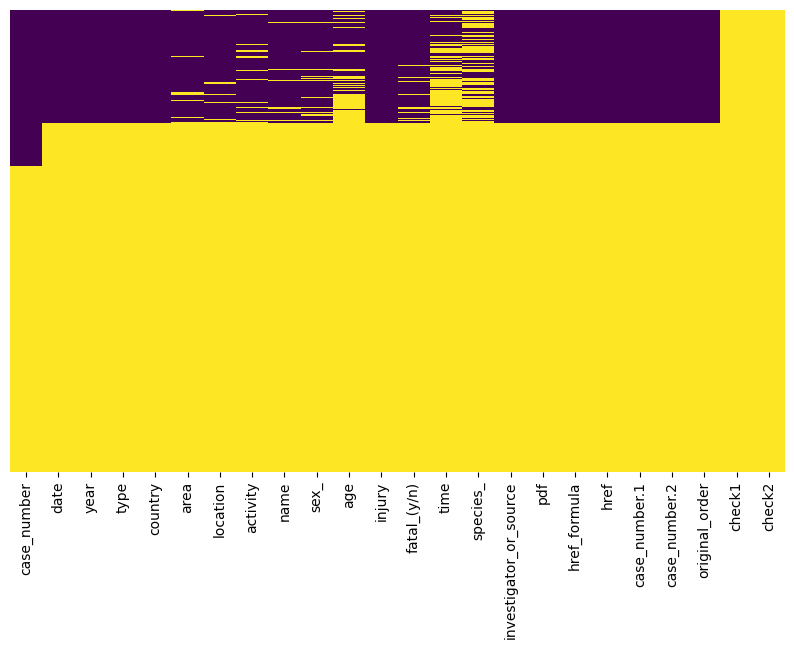

In [399]:
# We can visualize it

plt.figure(figsize=(10, 6))  # 100X60  pixeles

sns.heatmap(data.isna(),yticklabels=False,cmap='viridis',cbar=False)

<Axes: >

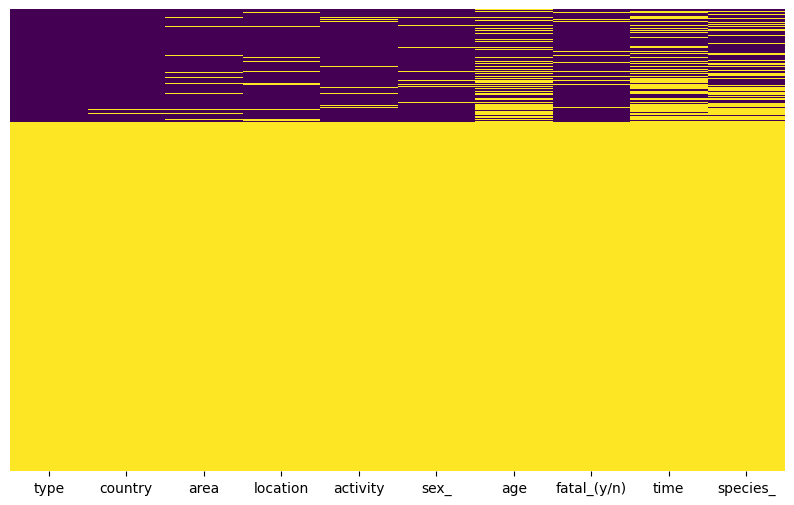

In [400]:
# Here we look at the same chart, but zooming into our columns of focus 

plt.figure(figsize=(10, 6))  # 100X60  pixeles

sns.heatmap(data[columns_focus].isna(),yticklabels=False,cmap='viridis',cbar=False)

## Unknown Colums 

In [401]:
# I will quickly check if the unknown columns could have relevant info (based on what we've seen above, they might be comment on the data set )

In [402]:
# I will zoom into column check1, where we have the unique value
# If it were a note, it coud be refering to the original_order column.  

data[data.check1=='stopped here']

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [403]:
#this is the value index 

check1_value_index = data[data.check1=='stopped here'].index
check1_value_index

Index([1478], dtype='int64')

In [404]:
#let me look around it 
#it says 'stopped here', can I identify anything that has stopped?
#for now, does not seem to be relevant, so I will ignore for now 

data[1477:1480]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
1477,2006.05.28,28-May-2006,2006.0,Provoked,USA,Hawaii,French Frigate Shoals,Tagging sharks,"25' rigid-hulled inflatable boat, HI-2",NaN,NaN,"No injury to occupants, boat damaged by hooked...",N,Afternoon,"Tiger shark, 15' female","Honolulu Advertiser, 5/29/2006",2006.05.28-HI-2.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.28,2006.05.28,4826.0,NaN,NaN
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN
1479,2006.05.24,24-May-2006,2006.0,Provoked,USA,Hawaii,Lanai,Spearfishing,Andres Balmacda,M,15,Knee bitten after diver poked shark PROVOKED I...,N,16h30,"Grey reef shark, 5' to 8'","Maui News, 5/26/2006",2006.05.24-Balmacda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.24,2006.05.24,4824.0,NaN,NaN


In [405]:
#this is the value index 

check1_value_index = data[data.check1=='stopped here'].index
check1_value_index

Index([1478], dtype='int64')

In [406]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'check1', 'check2'],
      dtype='object')

In [407]:
# I will zoom into column check2, where we have the unique values
#'Teramo', 'change filename'

#for now, does not seem to be relevant, so I will ignore for now

data[(data['check2'] == 'Teramo') | (data['check2'] == 'change filename')]


,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


## The issue with Attacks IDs: columns 'case_number', 'case_number.1', 'case_number.2', original_order 

- It seems there are different columns to represent the entry key for each shark attack. 
- case_number', 'case_number.1', 'case_number.2' seem to have similar values, but for not we are now sure. Also, they are clearly quite 'dirty' and would require a lot of work to be cleaned 
- 'original_order' seems to be a sequential list of values which could also be used to identify the attacks 

- Since this will not be relevant to the study at hand, I will disregard it for now

## Column fatal_(y/n)

In [408]:
#since we are trying to explain this variable, let us look into it and clean it. 
#we have seen above ~78% of its values are null.
#although we'd expect Y/N, we see there are different values and therefore we must clean them 

data['fatal_(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [409]:
#lets look into there frequency 

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

In [410]:
#if the value is null or unkown, it does not serve our purpose. 
#also, 2017 is clearly not applicable here. 
#M could be a typo for N, but since I can not be sure I will remove it 

In [411]:
#where are my NAs? 

bad_index_fatal = data['fatal_(y/n)'][data['fatal_(y/n)'].isna()].index
print(bad_index_fatal[:15])

Index([27, 76, 79, 84, 98, 107, 115, 124, 125, 145, 151, 153, 159, 187, 189], dtype='int64')


In [412]:
#I will drop them

data.drop(bad_index_fatal, axis=0, inplace=True)

In [413]:
#I am down 19960 values, which is consistent with the absolute count we had done 

print(data.shape)
print(data_original.shape)

(5763, 24)
(25723, 24)


In [414]:
#I will remove ['UNKNOWN', 'M', '2017']

bad_index_fatal = data[data['fatal_(y/n)'].isin(['UNKNOWN', 'M', 2017, '2017'])].index
print(bad_index_fatal)

Index([ 285,  624,  786, 1270, 2250, 2260, 2267, 2295, 2307, 2323, 2328, 2388,
       2404, 2409, 2648, 2650, 2661, 2806, 2882, 2900, 2943, 2996, 2998, 3006,
       3038, 3041, 3298, 3396, 3411, 3429, 3434, 3507, 3545, 3552, 3712, 3774,
       3794, 3838, 3841, 4060, 4208, 4256, 4269, 4310, 4323, 4517, 4689, 4786,
       4787, 4976, 4998, 5029, 5159, 5270, 5347, 5409, 5555, 5615, 5653, 5656,
       5674, 5708, 5709, 5998, 6081, 6153, 6165, 6166, 6167, 6169, 6171, 6172,
       6277],
      dtype='int64')


In [415]:
#quick check 
data[data['fatal_(y/n)'].isin(['UNKNOWN', 'M', 2017, '2017'])]

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,check1,check2
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0,NaN,NaN
624,2013.09.08,08-Sep-2013,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",NaN,female,F,NaN,No details,UNKNOWN,NaN,NaN,"WIS-TV, 9/9/2013",2013.09.08-St-Helena.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.09.08,2013.09.08,5679.0,NaN,NaN
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,NaN,NaN
1270,2008.04.20.a,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,NaN,Jamie Adlington,M,NaN,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m","T. Peake, GSAF",2008.04.20.a-Adlington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.20.a,2008.04.20.a,5033.0,NaN,NaN
2250,1997.06.07,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",Bathing,José Luiz Lipiani,M,NaN,NaN,UNKNOWN,NaN,NaN,"Globo, 6/9/1997",1997.06.07-NV-Lipiani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.06.07,1997.06.07,4053.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,1617.00.00.R,Reported 1617,1617.0,Unprovoked,INDIA,West Bengal,Ganges Delta,NaN,Indian people,NaN,NaN,NaN,UNKNOWN,NaN,NaN,"H. Edwards, p.31, citing Samuel Purchas",1617.00.00-Purchas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1617.00.00.R,1617.00.00.R,136.0,NaN,NaN
6169,1595.00.00,1595,1595.0,Unprovoked,INDIA,Kerala,River Cochin,Ship lay at anchor & man was working on its ru...,male,M,NaN,"Leg severed mid-thigh, hand severed, arm above...",UNKNOWN,NaN,NaN,The Voyage of John Huyghen van Linschoten,1595.00.00-Cochin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1595.00.00,1595.00.00,134.0,NaN,NaN
6171,1555.00.00,1555,1555.0,Unprovoked,NaN,NaN,NaN,Swimming,male,M,NaN,NaN,UNKNOWN,NaN,NaN,Olaus Magnus,1555.00.00 - Olaus Magnus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1555.00.00,1555.00.00,132.0,NaN,NaN
6172,1554.00.00,Ca. 1554,1554.0,Unprovoked,FRANCE,Nice & Marseilles,NaN,NaN,males (wearing armor),M,NaN,NaN,UNKNOWN,NaN,Possibly white sharks,G. Rondelet,1554.00.00-Rondelet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1554.00.00,1554.00.00,131.0,NaN,NaN


In [416]:
#I will remove ['UNKNOWN', 'M', '2017']

data.drop(bad_index_fatal, axis=0, inplace=True)

In [417]:
#I am down 73 values

print(data.shape)
print(data_original.shape)

(5690, 24)
(25723, 24)


In [418]:
#lastly, I will clean the rest of strings to be uppercase, no space

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N     4293
Y     1388
 N       7
N        1
y        1
Name: count, dtype: int64

In [419]:
#testing for one 

string = 'y '
string.upper().replace(' ','')

'Y'

In [420]:
data['fatal_(y/n)'] = data['fatal_(y/n)'].apply(lambda X: X.upper().replace(' ', ''))

In [421]:
#he limpiado la columna 

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N    4301
Y    1389
Name: count, dtype: int64

## Column Sex_

In [422]:
# Let us look at null values again
# 456 of sex_ values are null (~8%)

nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

case_number                  1
year                         1
type                         3
country                     43
area                       397
location                   472
activity                   384
name                       145
sex_                       456
age                       2458
injury                       1
time                      2897
species_                  2761
investigator_or_source      11
href_formula                 1
check1                    5689
check2                    5688
dtype: int64

In [423]:
#we still have 5690 values (threshold is 2500), so will drop nulls (could potentially derive from name, but it would be a lot of effort with low return)

data.shape

(5690, 24)

In [424]:
#bad indices 

bad_index_sex_ = data['sex_'][data['sex_'].isna()].index
print(bad_index_sex_[:15])

Index([32, 59, 86, 154, 179, 218, 243, 326, 446, 463, 465, 475, 513, 529, 560], dtype='int64')


In [425]:
#drop 
data.drop(bad_index_sex_, axis=0, inplace=True)

In [426]:
#I am down 456 values, consistent with the above

print(data.shape)
print(data_original.shape)

(5234, 24)
(25723, 24)


In [427]:
#what are the other values 

data.sex_.unique()

array(['F', 'M', 'M ', 'lli', 'N', '.'], dtype=object)

In [428]:
data.sex_.value_counts()

sex_
M      4653
F       575
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [429]:
#N and 'ili' are not sex categories. I will remove them 

bad_index_sex_ = data[data['sex_'].isin(['N', '.','lli'])].index
print(bad_index_sex_)

Index([1624, 4938, 5437, 6131], dtype='int64')


In [430]:
#drop 
data.drop(bad_index_sex_, axis=0, inplace=True)

In [431]:
data.sex_.value_counts()

sex_
M     4653
F      575
M        2
Name: count, dtype: int64

In [432]:
data['sex_'] = data['sex_'].apply(lambda X: X.upper().replace(' ', ''))

In [433]:
#clean!

data.sex_.value_counts()

sex_
M    4655
F     575
Name: count, dtype: int64

## Column Activity

In [434]:
# Let us look at null values again
# 290 of activity values are null (5%)

nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

case_number                  1
year                         1
type                         3
country                     39
area                       346
location                   420
activity                   290
name                        52
age                       2032
injury                       1
time                      2529
species_                  2543
investigator_or_source      10
href_formula                 1
check1                    5229
check2                    5228
dtype: int64

In [435]:
#we still have 5230 values (threshold is 2500), so will drop nulls

data.shape

(5230, 24)

In [436]:
#bad indices 

bad_index_activity = data['activity'][data['activity'].isna()].index
print(bad_index_activity[:15])

Index([47, 108, 112, 114, 182, 185, 245, 255, 296, 300, 368, 394, 414, 424,
       462],
      dtype='int64')


In [437]:
#drop 
data.drop(bad_index_activity, axis=0, inplace=True)

In [438]:
#I am down 290 values, consistent with the above

print(data.shape)
print(data_original.shape)

(4940, 24)
(25723, 24)


In [442]:
data.activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Swimming around anchored ship',
       'Crew swimming alongside their anchored ship',
       '4 men were bathing'], dtype=object)

In [443]:
data.activity.value_counts()

activity
Surfing                                                                                                                                                 905
Swimming                                                                                                                                                755
Fishing                                                                                                                                                 320
Spearfishing                                                                                                                                            292
Bathing                                                                                                                                                 143
                                                                                                                                                       ... 
Small boat with 2 men onboard hit a submerged coral for